In [1]:
import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset  # 텐서데이터셋
from torch.utils.data import DataLoader  # 데이터로더
from torch.utils.data import Dataset



--- 
 - 로지스틱 회귀(Logistic Regression) 
   - 일상 속 풀고자하는 많은 문제 중에서는 두 개의 선택지 중에서 정답을 고르는 문제가 많습니다. 
   - 예를 들어 시험을 봤는데 이 시험 점수가 합격인지 불합격인지가 궁금할 수도 있고, 어떤 메일을 받았을 때 이게 정상 메일인지 스팸 메일인지를 분류하는 문제도 그렇습니다. 이렇게 둘 중 하나를 결정하는 문제를 이진 분류(Binary Classification)라고 합니다. 그리고 이진 분류를 풀기 위한 대표적인 알고리즘으로 로지스틱 회귀(Logistic Regression)가 있습니다. 
   - 로지스틱 회귀는 알고리즘의 이름은 회귀이지만 실제로는 분류(Classification) 작업에 사용할 수 있습니다. 


--- 
 - 시그모이드 함수(Sigmoid function) 
   - 위와 같이 S자 형태로 그래프를 그려주는 시그모이드 함수의 방정식은 아래와 같습니다. 
 ![](https://render.githubusercontent.com/render/math?math=H%28x%29%20%3D%20sigmoid%28Wx%20%2B%20b%29%20%3D%20%5Cfrac%20%7B1%7D%20%7B1%20%2B%20e%5E%7B-%28Wx%20%2B%20b%29%7D%7D%20%3D%20%5Csigma%20%28Wx%20%2B%20b%29) 
   - 선형 회귀에서는 최적의 W와 b를 찾는 것이 목표였습니다. 
   - 여기서도 마찬가지입니다. 
   - 선형 회귀에서는 W가 직선의 기울기, b가 y절편을 의미했습니다. 
   - 그렇다면 여기에서는 W와 b가 함수의 그래프에 어떤 영향을 주는지 직접 그래프를 그려서 알아보겠습니다. 


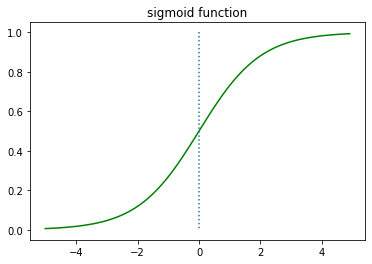

In [2]:


# %matplotlib inline
import numpy as np  # 넘파이 사용
import matplotlib.pyplot as plt  # 맷플롯립사용


def sigmoid(x):
    res = 1 / (1 + np.exp(-x))
    return res


x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, "g")
plt.plot([0, 0], [1, 0], ":")
plt.title("sigmoid function")
plt.show()



--- 
 - 비용 함수(Cost function) 
   - y 의 실제값이 1일 때 −logH(x) 그래프를 사용하고 
   - y의 실제값이 0일 때 −log(1−H(X)) 그래프를 사용해야 합니다. 
   - 이는 다음과 같이 하나의 식으로 통합할 수 있습니다. 
 ![](https://render.githubusercontent.com/render/math?math=cost(W) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}logH(x^{(i)}) %2B (1-y^{(i)})log(1-H(x^{(i)}))]) 


In [3]:


torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
mu.log("hypothesis", hypothesis)
mu.log("y_train", y_train)

hypothesis = torch.sigmoid(x_train.matmul(W) + b)
mu.log("hypothesis", hypothesis)
mu.log("y_train", y_train)

losses = -(y_train * torch.log(hypothesis)) + (1 - y_train) * torch.log(1 - hypothesis)
cost = losses.mean()
mu.log("losses", losses)
mu.log("cost", cost)

loss = F.binary_cross_entropy(hypothesis, y_train)
mu.log("loss.item()", loss.item())




hypothesis : 
    torch.Size([6, 1]) tensor([[0.5000],
            [0.5000],
            [0.5000],
            [0.5000],
            [0.5000],
            [0.5000]])

y_train : 
    torch.Size([6, 1]) tensor([[0.],
            [0.],
            [0.],
            [1.],
            [1.],
            [1.]])

hypothesis : 
    torch.Size([6, 1]) tensor([[0.5000],
            [0.5000],
            [0.5000],
            [0.5000],
            [0.5000],
            [0.5000]])

y_train : 
    torch.Size([6, 1]) tensor([[0.],
            [0.],
            [0.],
            [1.],
            [1.],
            [1.]])

losses : 
    torch.Size([6, 1]) tensor([[-0.6931],
            [-0.6931],
            [-0.6931],
            [ 0.6931],
            [ 0.6931],
            [ 0.6931]])

cost : 
    torch.Size([]) 0.0

loss.item() : 0.6931471824645996


--- 
 모델의 훈련 과정까지 추가한 전체 코드는 아래와 같습니다. 


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
-------------------------------------------------------------------------------- 
epoch :    0/1000 
cost : 0.693147 


W : 
    torch.Size([2, 1]) tensor([[0.7500],
            [0.1667]])

b : 
    torch.Size([1]) tensor([1.4901e-08])

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
-------------------------------------------------------------------------------- 
epoch :  100/1000 
cost : 0.134722 

W : 
    torch.Size([2, 1]) tensor([[1.5568],
            [0.3875]])

b : 
    torch.Size([1]) tensor([-6.0299])

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
--------------------------------------------

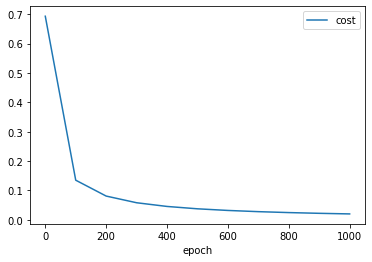

prediction : 
    torch.Size([6, 1]) tensor([[False],
            [False],
            [False],
            [ True],
            [ True],
            [ True]])

y_data : [[0], [0], [0], [1], [1], [1]]


In [4]:

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W, b], lr=1)
nb_epoches = 1000
mu.plt_init()

for epoch in range(nb_epoches + 1):
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis)).mean()
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print("-" * 80)
        print("-" * 80)
        mu.log_epoch(epoch, nb_epoches, cost)
        mu.log("W", W)
        mu.log("b", b)

mu.plt_show()

prediction = hypothesis >= torch.FloatTensor([0.5])
mu.log("prediction", prediction)
mu.log("y_data", y_data)
